In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from my_module import functions as my_utils


My Project Description: 

This project utilizes code to explore the realm of data analysis in response to data gathered in a previous study. For my IB psych class in high school I replicated the Peterson and Peterson 1959 study. The basis of the experiment was to understand the transfer of information between short and long term memory through rehearsal. Researchers asked participants to recall a series of trigrams which are meaningless three-consonant words such as TGH. Participants recalled the trigrams after 3, 6, 9, 12, 15, and 18 seconds. Researchers utilized a specific technique to try and delay the percent of correctly recalled trigrams by having participants count backwards in threes and fours from a random specified number.    

In the replication of the study I gathered and analyzed data about the number of accuratly recalled trigrams but explored a little further by looking at the effect of gender and age on recall of short term memory. During the period of data collection I utilized excel to plot the data. However, I wanted to analyze the data through python code and intertwine the worlds of coding and psychology as the reason behind me taking COGS18 was to fulfill a requirement for my psychology major. The results looked at the percent of correctly recalled trigrams (set of 3) through the different time increments and compares the percentages with different age groups and genders.  

In [6]:
# Read csv file
df = my_utils.read_csv_file('my_module/Rojina_Trials.csv')

# let's take a quick look at the data
df.head()

,Name,Gender,Age,3seconds,6seconds,9seconds,18seconds
0,Trail1,F,Young,100%,100%,67%,33%
1,Trail2,F,Young,100%,100%,100%,100%
2,Trail3,F,Young,100%,100%,67%,67%
3,Trail4,F,Young,100%,100%,67%,33%
4,Trail5,F,Young,67%,0%,100%,100%


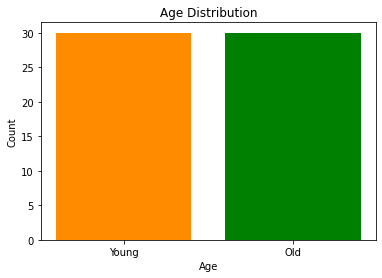

In [7]:
# Count the occurrences of each age group
age_counts = df['Age'].value_counts()
# Plotting age distribution of data
plt.bar(age_counts.index, age_counts.values, color=['darkorange', 'green'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

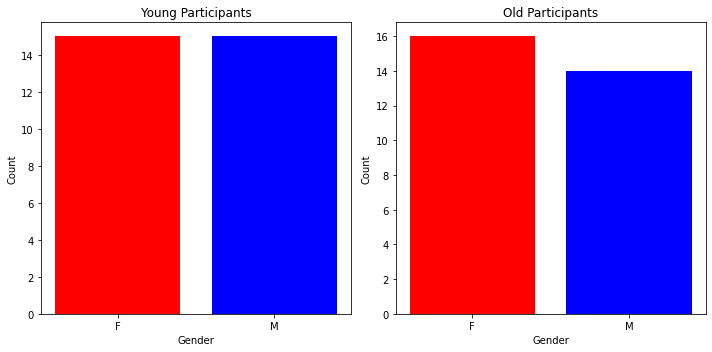

In [8]:
# we see we have equal number of prarticipants for each age group (18 y/o and 45-55 y/o)
# now let's look at the distirbution of gender within each age group

# Count males and females for young and old participants
young_counts = df[df['Age'] == 'Young']['Gender'].value_counts()
old_counts = df[df['Age'] == 'Old']['Gender'].value_counts()

# Plot gender distibutions for each age group
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot counts of males and females for young participants
axes[0].bar(young_counts.index, young_counts.values, color=['red', 'blue'])
axes[0].set_title('Young Participants')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot counts of males and females for old participants
axes[1].bar(old_counts.index, old_counts.values, color=['red', 'blue'])
axes[1].set_title('Old Participants')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
# We see that the young group has 50-50 male/female and the old/young group while not exactly 50-50, the gender distribution
# is still almost evenly distibuted so we will continue with the analysis

# Convert percent values to decimal in multiple columns
# Iterate over DataFrame rows and convert percent values to decimal
for index, row in df.iterrows():
    for column in ['3seconds', '6seconds', '9seconds', '18seconds']:
        df.at[index, column] = my_utils.convert_to_decimal(row[column])

# let's print the top 5 rows of the dataframe to see ifmwe successfully converted
# the etnries from percent format to floats
df.head()

,Name,Gender,Age,3seconds,6seconds,9seconds,18seconds
0,Trail1,F,Young,1.0,1.0,0.67,0.33
1,Trail2,F,Young,1.0,1.0,1.0,1.0
2,Trail3,F,Young,1.0,1.0,0.67,0.67
3,Trail4,F,Young,1.0,1.0,0.67,0.33
4,Trail5,F,Young,0.67,0.0,1.0,1.0


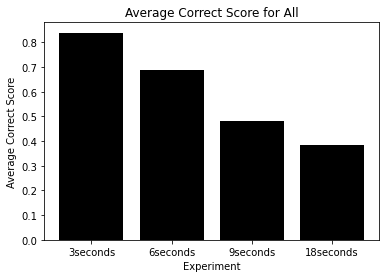

In [10]:
# Let's take the average of each experiment and look at the bar plots
average_all = []

experiment_list = ['3seconds', '6seconds', '9seconds', '18seconds']
# Calculate average time separately for 'Young' and 'Old' for each column
for column in experiment_list:
    average_all.append(df[column].mean())

# Plotting
plt.bar(experiment_list, average_all, color='black')
plt.xlabel('Experiment')
plt.ylabel('Average Correct Score')
plt.title('Average Correct Score for All')
plt.show()

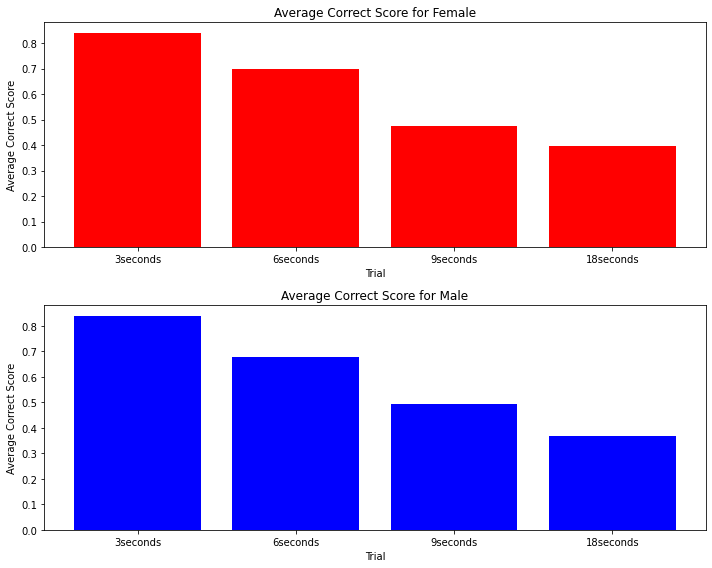

In [11]:
# Lets investigate if there is a difference in gender
# Calculate average time separately for 'Male' and 'Female' for each column
average_female = df[df['Gender'] == 'F'][experiment_list].mean()
average_male = df[df['Gender'] == 'M'][experiment_list].mean()

# Plotting average correct for each experiment, seperated by gender
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# Plot average correct for Female
my_utils.plot_average_score_gender(axes[0], average_female, 'red', 'Female')
# Plot average correct for Male
my_utils.plot_average_score_gender(axes[1], average_male, 'blue', 'Male')
plt.tight_layout()
plt.show()

The chart displays the percentage of accurately recalled trigrams for the male and female groups almost the same. 

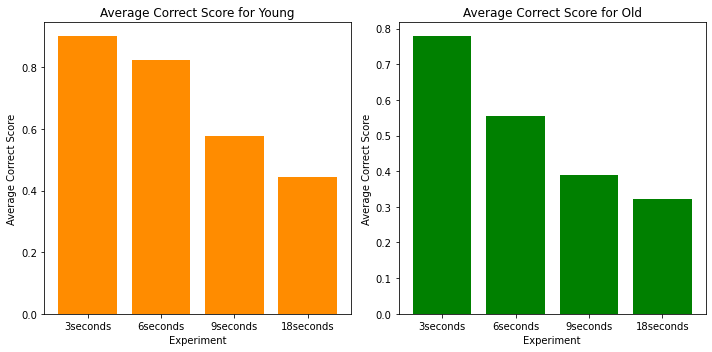

In [12]:
# Now let's see how each age group did
# Lists to store average times for Young and Old
average_old = []
average_young = []

# Calculate average time separately for 'Young' and 'Old' for each column
for column in experiment_list:
    average_young.append(df[df['Age'] == 'Young'][column].mean())
    average_old.append(df[df['Age'] == 'Old'][column].mean())

# Plotting Average correct for each experiment, seperated by Age
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for young
my_utils.plot_average_score_age(
    axes[0], experiment_list, average_young, 'Average Correct Score for Young', 'Experiment', 'Average Correct Score', 'darkorange')

# Plot for old
my_utils.plot_average_score_age(
    axes[1], experiment_list, average_old, 'Average Correct Score for Old', 'Experiment', 'Average Correct Score', 'green')

plt.tight_layout()
plt.show()


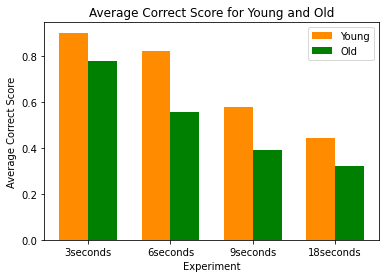

In [13]:
# Now let's plot the bars side-by-side so we can have a better visual
bar_width = 0.35
index = range(len(experiment_list))
plt.bar(index, average_young, bar_width, color='darkorange', label='Young')
plt.bar([i + bar_width for i in index], average_old,
        bar_width, color='green', label='Old')

plt.xlabel('Experiment')
plt.ylabel('Average Correct Score')
plt.title('Average Correct Score for Young and Old')
plt.xticks([i + bar_width / 2 for i in index], experiment_list)
plt.legend()
plt.show()


The age group for older people display less accurate recall of trigrams compared to the young age group. 

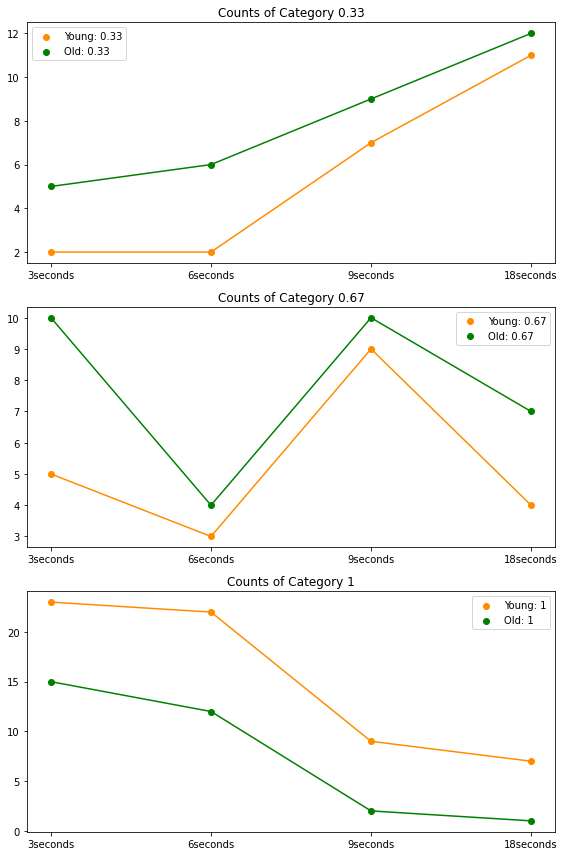

In [14]:
# Now let's investigate whether there is a trend in the number of correct counts as Experiments change.
# We will seperate Young and Old

# For Young data, iterate through each column (trial) and count occurrences of each category
count_young_033 = my_utils.get_countbreakdown_age(df, experiment_list, 'Young', 0.33)
count_young_067 = my_utils.get_countbreakdown_age(df, experiment_list, 'Young', 0.67)
count_young_1 = my_utils.get_countbreakdown_age(df, experiment_list, 'Young', 1)



# For Old data, iterate through each column (trial) and count occurrences of each category
count_old_033 = my_utils.get_countbreakdown_age(df, experiment_list, 'Old', 0.33)
count_old_067 = my_utils.get_countbreakdown_age(df, experiment_list, 'Old', 0.67)
count_old_1 = my_utils.get_countbreakdown_age(df, experiment_list, 'Old', 1)


# Now let's see if there is a trend
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot counts for each category
my_utils.plot_counts_breakdown(axes[0], experiment_list, count_young_033,
                      count_old_033, '0.33', 'Counts of Category 0.33')
my_utils.plot_counts_breakdown(axes[1], experiment_list, count_young_067,
                      count_old_067, '0.67', 'Counts of Category 0.67')
my_utils.plot_counts_breakdown(axes[2], experiment_list, count_young_1,
                      count_old_1, '1', 'Counts of Category 1')

plt.tight_layout()
plt.show()

Based on the graphs above we are able to observe that for both young and old age groups, as the experiment time increases the number of remembering a third of the trigrams increases and amount of remembering all trigrams decreases. Interestingly, the number of remembering 67% is neither increasing nor decreasing. My conjencture is that with more data we can see a more visible trend. 

Conclusion: 

Being able to analyze data from my past psychology study through python illustrates how my learning has grown from my transition to highschool and college, which is something I am very thankful for. Being someone who wants to pursue a career in psychology and participate in my own possible research I learned a lot from being able to familiarize myself with python analysis and gain the ability to anaylize data through different medians. 

Future work: 

This project could be improved by increasing my sample size. We could also consider and analyze the effects of other factors on memory recall, such as diet, exercise level, and other metrics for health. 

Extra Credit:

I had never coded prior to this class. In fact, this project was inspired from a project that I completed in highschool. Expanding my data analysis knowledge from excel to python was very rewarding but also challenging, specifically with creating the visual charts. After spending a lot of time I was finally able to plot the figures the way I wanted. After I painstakingly got the plots, I had to go back and recode the plots so thet they used functions. By using functions, I condensed my code 3-4 folds. It was difficult to write the functions to give me the same plots as before, but I am glad I put in the time to learn how to accurately and effectively utilize functions to produce an accurate representation of my data while also producing a cleaner code as the final product.